# Chapter 11: Sequence Databases: Representation, Creation, and Statistics

In [2]:
from PAMI.extras.syntheticDataGenerator import SequentialDatabase as db

# Create synthetic sequential database
obj = db.SequentialDatabase(
    databaseSize=100000,
    numItems=1000,
    avgItemsPerPatterns=10,
    avgPatternsPerSequence=10,
    seqSep='-1'
)


# Generate and save the data
obj.create()
obj.save('sequentialDatabase.csv')

# Read the generated sequences into a DataFrame
sequentialDataFrame = obj.getTransactions()

# Print performance stats
print('Runtime:       ' + str(obj.getRuntime()))
print('Memory (RSS):  ' + str(obj.getMemoryRSS()))
print('Memory (USS):  ' + str(obj.getMemoryUSS()))


Runtime:       24.345705032348633
Memory (RSS):  40321024
Memory (USS):  21676032


In [1]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

# Generate random data (4 rows, 4 columns)
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data, columns=['Item1', 'Item2', 'Item3', 'Item4'])

# Generate random customer IDs (1 row, 4 columns → transpose to match 4 rows)
customerID = np.random.randint(1, 3, size=(4, 1))  # Changed shape
customerIDdataFrame = pd.DataFrame(customerID, columns=['customerID'])

# Combine customer ID and item data
dataFrame = pd.concat([customerIDdataFrame, dataFrame], axis=1)

# Convert DataFrame to database object
obj = alg.DF2DB(dataFrame)
obj.convert2SequentialDatabase(
    sep='\t',  # Specify the separator for the database
    oFile='sequentialDatabase.csv'  # Output file name
)

Database size (total no of sequence) : 10017
Number of items : 1000
Minimum Sequence Size : 0
Total Length of all sequences: 89972 and number of sequences: 10017
Average Sequence Size : 8.981930717779774
Maximum Sequence Size : 24
Standard Deviation Sequence Size : 3.178573401423905
Variance in Sequence Sizes : 10.104336480573055
Sequence size (total no of subsequence) : 89972
Minimum subSequence Size : 10
Average subSequence Size : 10.0
Maximum subSequence Size : 10
Standard Deviation Sequence Size : 0.0
Variance in Sequence Sizes : 0


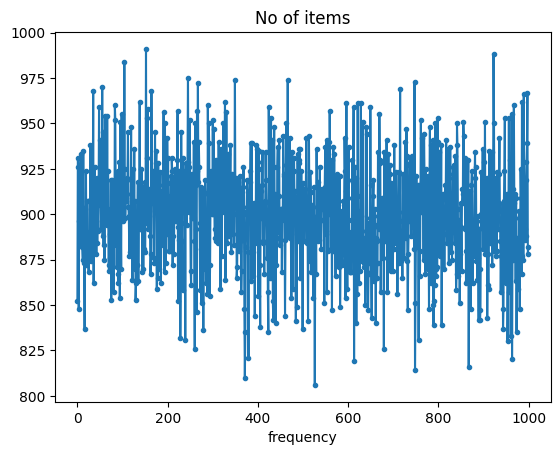

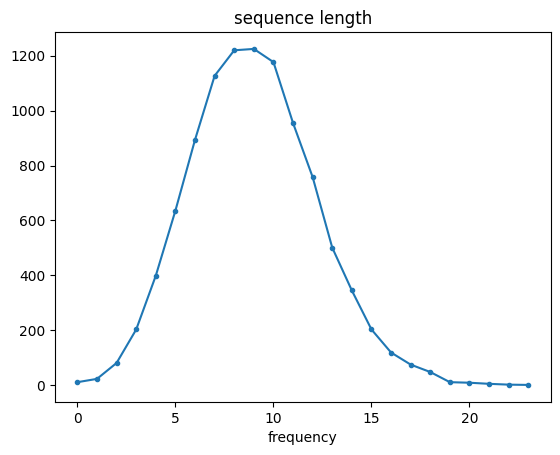

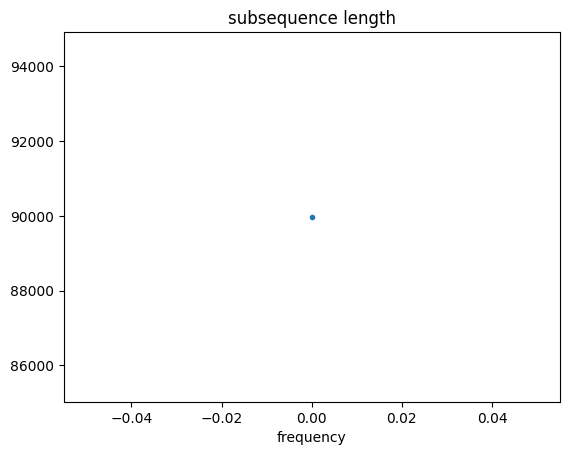

In [5]:
from PAMI.extras.stats import sequentialDatabase as stat

obj = stat.sequentialDatabase("sequentialDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()